In [1]:
import random as rd
import os, re
from IPython.display import Image, display
import pytumblr

# Load recently downloaded pictures

In [ ]:
EXPR = r'\d*_\d*_\d*_\w\.(?:jpg|png)'
allfiles = !ls /Users/arthurb/Downloads/
allfiles = '\n'.join(allfiles)
m = re.findall(EXPR, allfiles)
dwl_imgs = ' '.join(m)
!cd /Users/arthurb/Downloads/ && mv {dwl_imgs} /Users/arthurb/Documents/Codes/tumblr/imgs/

# Sample N_selec pictures and check them

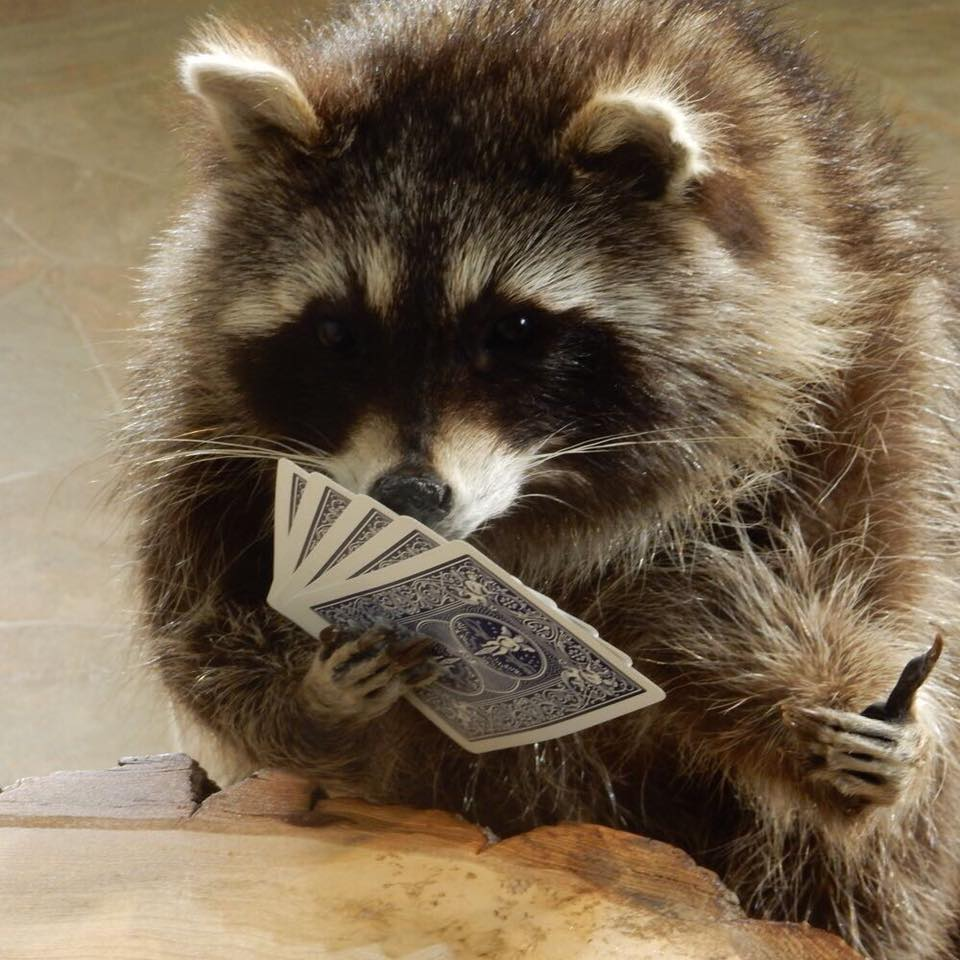

17523066_1388707447818613_1653747526356429240_n.jpg


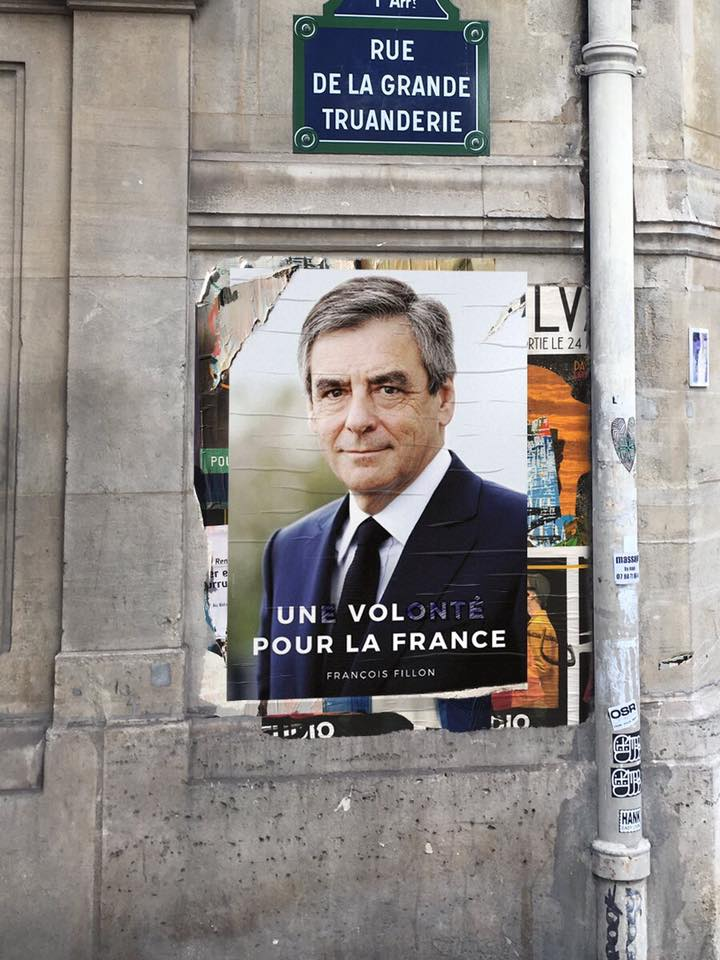

17553706_1420490371349118_8001983349195496760_n.jpg


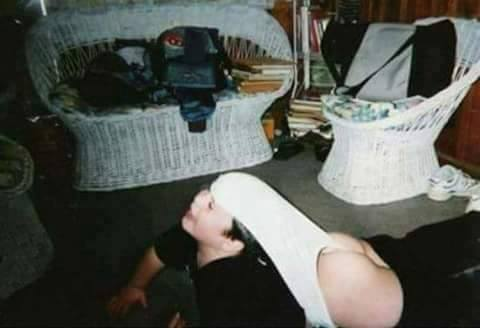

16831831_1164245250350842_8973845523127752598_n.jpg


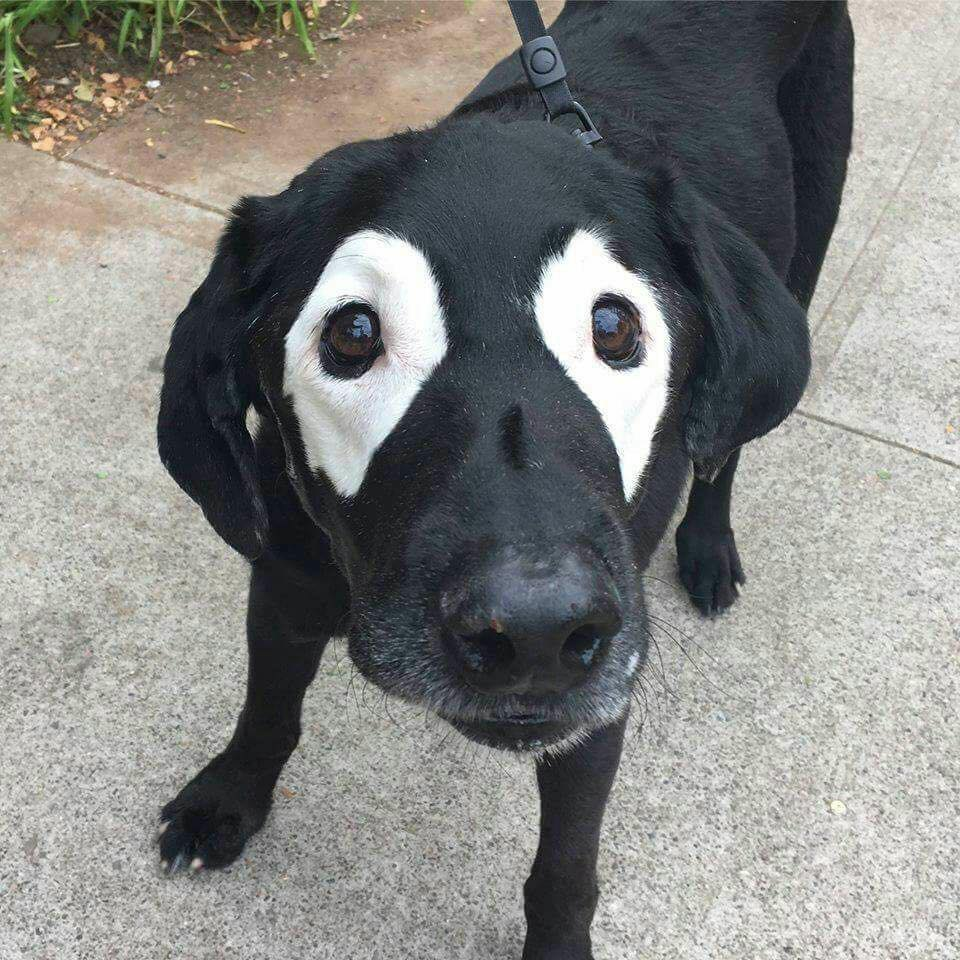

17457693_631389957060473_527685590268730968_n.jpg


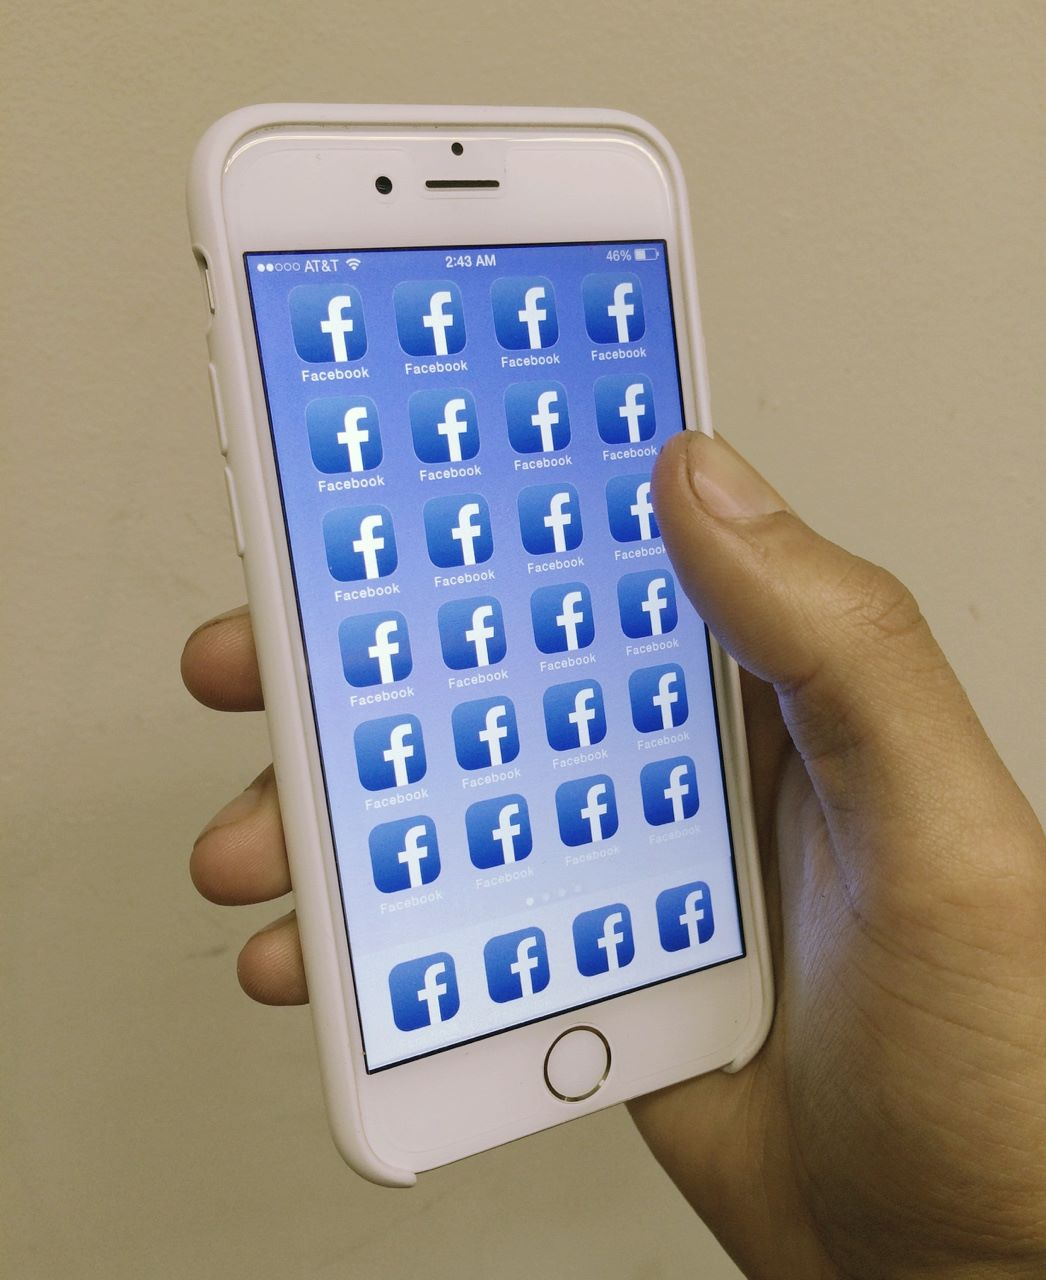

17240366_622300184636117_388689068836008400_o.jpg


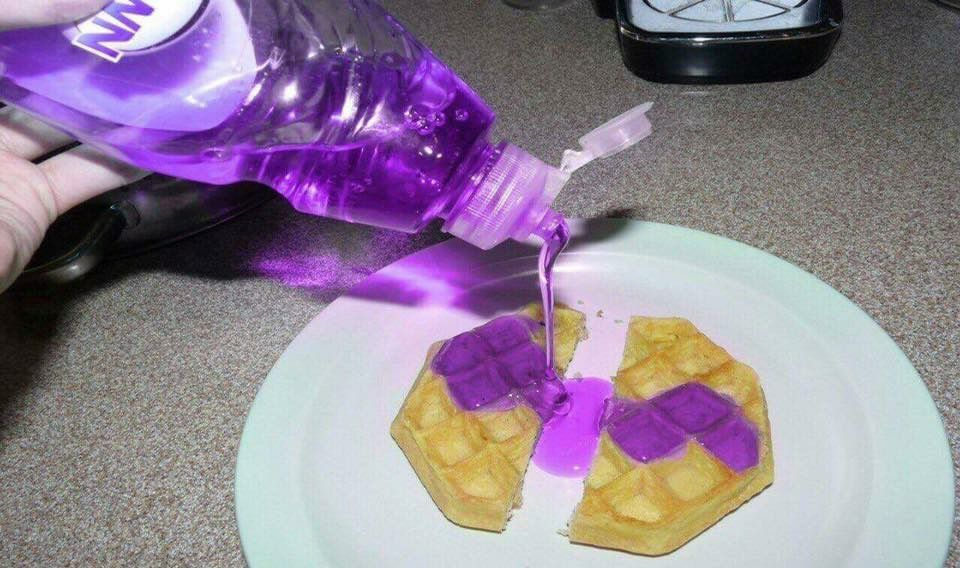

16939152_1881568418792104_9151321942766270877_n.jpg


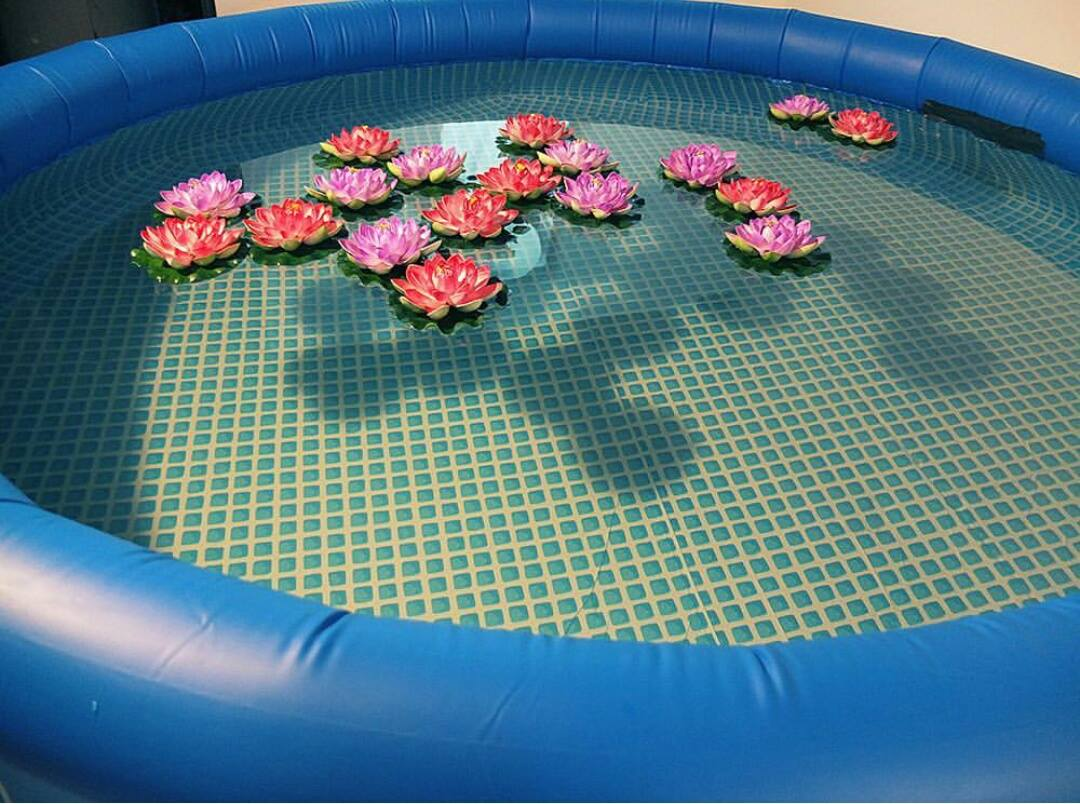

17880188_612209572319675_1336997064980962959_o.jpg


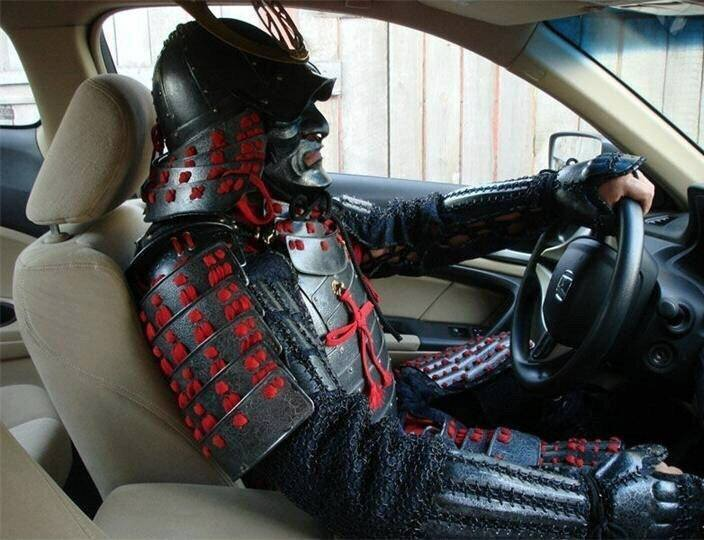

16999127_1639141579436627_3733809379598856068_n.png


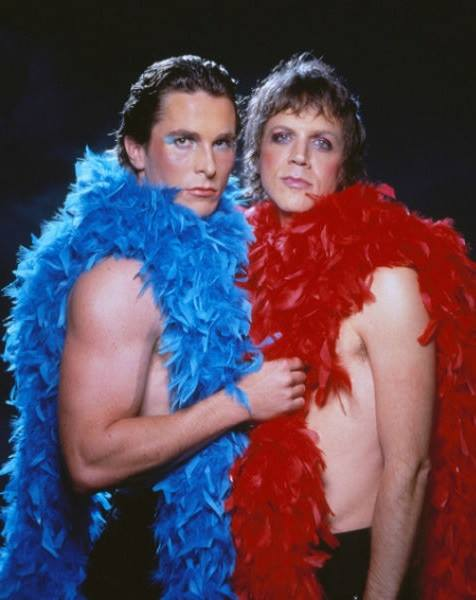

17634546_1559456077432542_4143543358992295688_n.jpg


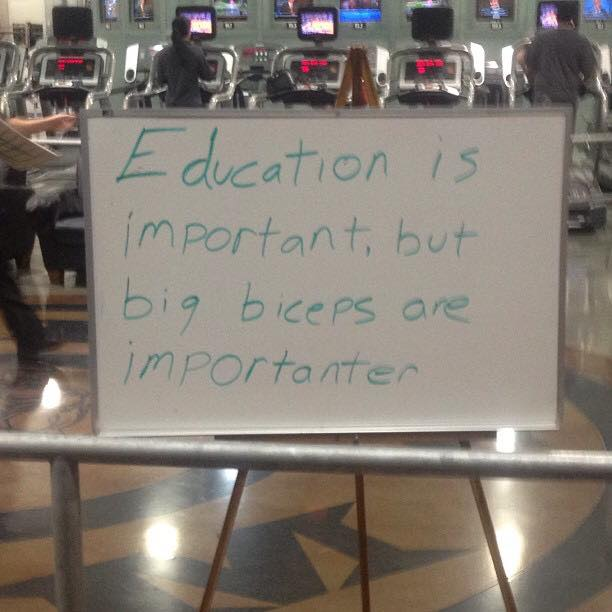

16832273_1357207584301933_4026256254402383769_n.jpg


In [6]:
N_selec = 10
tot_imgs = !ls imgs/
newimages = rd.sample(tot_imgs, N_selec)
for img in newimages: display(Image(filename='imgs/%s'%img, width=200)); print img

# Remove pictures if needed

In [ ]:
list2rm = []
for img in list2rm:
    !rm {'./imgs/%s'%img}
    print '%s removed'%img

# Replace if needed

In [ ]:
def replace_some(list2replace, imgs, originallist):
    newimages = rd.sample(imgs, len(list2replace))
    ite = 0
    while sum([f in list2replace for f in newimages]) and ite < 100:
        newimages = rd.sample(imgs, len(list2replace)); ite += 1
    if ite == 100:
        print 'didnt found...'
    else:
        newlist = []
        for img in originallist + newimages:
            if img not in list2replace: newlist.append(img)
        return newlist

In [ ]:
undesired = []
newimages = replace_some(undesired, tot_imgs, newimages)
for img in newimages: display(Image(filename='imgs/%s'%img, width=200)); print img

# Mv into directory for publication

In [ ]:
for img in newimages:
    !mv {'imgs/%s'%img} {'topublish/%s'%img}

# Remove pictures which could have been already published

In [ ]:
published = !md5sum published/*
published5sum = [a.split()[0] for a in published]
topublish = !md5sum topublish/*
topublish5sum = [a.split()[0] for a in topublish]
for i,img in enumerate(topublish5sum):
    if img in published5sum:
        !rm {topublish[i].split()[-1]} && echo {topublish[i].split()[-1]} removed

# Publish!

In [ ]:
def publish():
    # Load personnal info
    with open('consumer_id.cfg', 'r') as f: consumer_id = [id_.split('\n')[0] for id_ in f.readlines()]
    consumer_key, consumer_secret, oauth_token, oauth_secret, blog_name = consumer_id
    # Identificate
    client = pytumblr.TumblrRestClient(consumer_key, consumer_secret, oauth_token, oauth_secret)
    # Request post
    req = client.posts(blog_name)
    # Post
    img_path  = !ls -d $PWD/topublish/*
    posted = client.create_photo(blog_name.split('.')[0], state="published", data=img_path)
    # Move once posted
    published_imgs = ' '.join(img_path)
    !mv {published_imgs} published/

In [ ]:
len2pub = !ls topublish/ | wc -l
len2pub = int(len2pub[0].split()[0])
if len2pub == N_selec:
    publish()